# Getting started with the eemeter library

This jupyter notebook is an interactive tutorial. It walks through loading data, running the CalTRACK methods, and plotting results. You'll run all the code yourself. Run through from the top and use `<shift><enter>` to run cells. If you feel so inspired, make edits and go deeper if you'd like.

In [1]:
%matplotlib inline

In [2]:
import eemeter

Let's load up some meter and temperature data from samples that come packaged with the eemeter.

*Note: the sample data is simulated, not real!*

In [3]:
meter_data, temperature_data, metadata = eemeter.load_sample('il-electricity-cdd-hdd-daily')

In [4]:
baseline_end_date = metadata['blackout_start_date']
reporting_start_date = metadata['blackout_end_date']

The convention for formatting meter data is to create a [pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) with a [DatetimeIndex](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DatetimeIndex.html) and a column of meter readings called `value`. The index datetime values represent the start date of a metering period. For data with variable period lengths (e.g., billing data), the end date of the period is assumed to be end date next point. To provide the end point of the last point, an extra point is often appended with the final end date and a NaN value.

In [5]:
meter_data.head()

,value
start,
2015-11-22 00:00:00+00:00,32.34
2015-11-23 00:00:00+00:00,23.80
2015-11-24 00:00:00+00:00,26.26
2015-11-25 00:00:00+00:00,21.32
2015-11-26 00:00:00+00:00,6.70


The convention for formatting temperature is as a [pandas Series](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html), also with a DatetimeIndex.

In [6]:
temperature_data.head()

dt
2015-11-22 06:00:00+00:00    21.01
2015-11-22 07:00:00+00:00    20.35
2015-11-22 08:00:00+00:00    19.38
2015-11-22 09:00:00+00:00    19.02
2015-11-22 10:00:00+00:00    17.82
Name: tempF, dtype: float64

Let's use some eemeter plotting functions to see what our data looks like.

(<matplotlib.axes._subplots.AxesSubplot at 0x7fe48029dd68>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe48026bda0>)

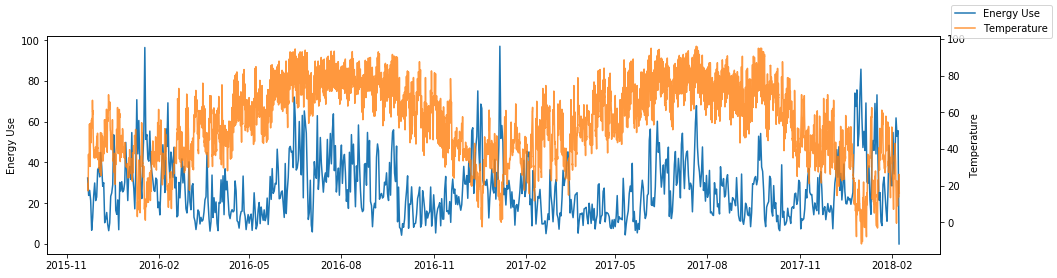

In [7]:
eemeter.plot_time_series(meter_data, temperature_data, figsize=(16, 4))

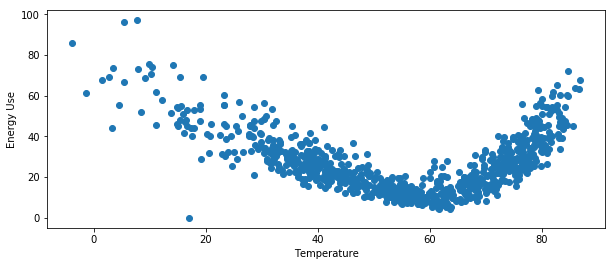

In [8]:
eemeter.plot_energy_signature(meter_data, temperature_data)

To make this into a dataset that can support analysis, we need to merge the meter data and temperature data into a single DataFrame. The `merge_temperature_data` function also lets us create a bunch of heating and cooling degree day values if we specify balance points to use. In this case, we'll use the balance point ranges recommended in the CalTRACK spec.

In [9]:
data = eemeter.merge_temperature_data(
    meter_data, temperature_data,
    heating_balance_points=range(40, 81),  # a list like this [40, 41, 42, ... 79, 80]
    cooling_balance_points=range(50, 91),
    data_quality=True,  # add some measures of data quality so we can check data sufficiency later
)

In [10]:
data.head()

,meter_value,temperature_not_null,temperature_null,temperature_mean,cdd_50,cdd_51,cdd_52,cdd_53,cdd_54,cdd_55,...,hdd_73,hdd_74,hdd_75,hdd_76,hdd_77,hdd_78,hdd_79,hdd_80,n_days_dropped,n_days_kept
start,,,,,,,,,,,,,,,,,,,,,
2015-11-22 00:00:00+00:00,32.34,18,0.0,26.740000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,46.260000,47.260000,48.260000,49.260000,50.260000,51.260000,52.260000,53.260000,0.0,1.0
2015-11-23 00:00:00+00:00,23.80,24,0.0,38.831667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,34.168333,35.168333,36.168333,37.168333,38.168333,39.168333,40.168333,41.168333,0.0,1.0
2015-11-24 00:00:00+00:00,26.26,24,0.0,41.304583,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,31.695417,32.695417,33.695417,34.695417,35.695417,36.695417,37.695417,38.695417,0.0,1.0
2015-11-25 00:00:00+00:00,21.32,24,0.0,49.198333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,23.801667,24.801667,25.801667,26.801667,27.801667,28.801667,29.801667,30.801667,0.0,1.0
2015-11-26 00:00:00+00:00,6.70,24,0.0,57.856667,7.856667,6.856667,5.856667,4.856667,3.856667,2.856667,...,15.143333,16.143333,17.143333,18.143333,19.143333,20.143333,21.143333,22.143333,0.0,1.0


We can also filter this data so that it contains just the baseline data.

In [11]:
baseline_data = eemeter.get_baseline_data(data, end=baseline_end_date, max_days=365)

In [12]:
baseline_data.index.min(), baseline_data.index.max()

(Timestamp('2015-12-27 00:00:00+0000', tz='UTC', freq='D'),
 Timestamp('2016-12-26 00:00:00+0000', tz='UTC', freq='D'))

In [13]:
model_fit = eemeter.caltrack_daily_method(baseline_data)

To see what this model fit looks like, we can plot the result.

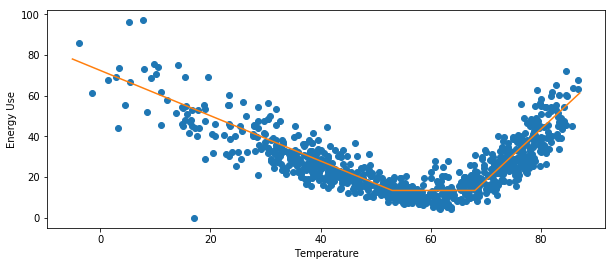

In [14]:
ax = eemeter.plot_energy_signature(meter_data, temperature_data)
eemeter.plot_model_fit(model_fit, ax=ax, temp_range=(-5, 88))

If we're interested in seeing more about models the CalTRACK method tried, we can even plot all the model candidates as well. There are a tom of these, so you the reduced alpha makes it a bit easier to see what's going on. Candidates appear green if `QUALIFIED` and red if `DISQUALIFIED`. (This example doesn't have any disqualified fits.)

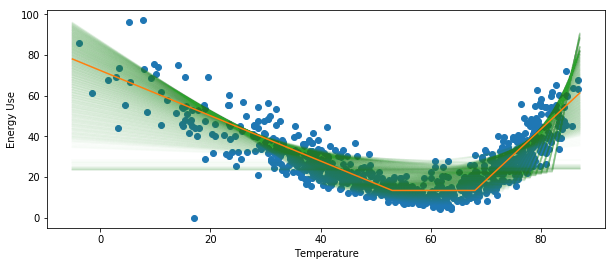

In [15]:
ax = eemeter.plot_energy_signature(meter_data, temperature_data)
eemeter.plot_model_fit(model_fit, ax=ax, candidate_alpha=0.02, with_candidates=True, temp_range=(-5, 88))

In addition to being plottable, the model_fit object is an instance of the class [eemeter.ModelFit](http://eemeter.openee.io/api.html#eemeter.ModelFit) object contains a bunch of interesting information about this modeling process. 

For instance, there's a status. This status is either `'SUCCESS'`, `'NO MODEL'` (if no candidate models qualified), or `'NO DATA'` (if no data was given).

In [16]:
model_fit.status

'SUCCESS'

There is also a "best" candidate model:

In [17]:
model_fit.model

CandidateModel(model_type='cdd_hdd', formula='meter_value ~ cdd_68 + hdd_53', status='QUALIFIED', r_squared=0.769)

In [18]:
model_fit.r_squared

0.7691606470569753

And a list of all candidate models that were tried, most of which have lower r-squared than the best model.

In [19]:
model_fit.candidates[:10]  # (there are a lot, so only showing the first 10)

[CandidateModel(model_type='intercept_only', formula='meter_value ~ 1', status='QUALIFIED', r_squared=0),
 CandidateModel(model_type='hdd_only', formula='meter_value ~ hdd_40', status='QUALIFIED', r_squared=0.273),
 CandidateModel(model_type='hdd_only', formula='meter_value ~ hdd_41', status='QUALIFIED', r_squared=0.274),
 CandidateModel(model_type='hdd_only', formula='meter_value ~ hdd_42', status='QUALIFIED', r_squared=0.274),
 CandidateModel(model_type='hdd_only', formula='meter_value ~ hdd_43', status='QUALIFIED', r_squared=0.273),
 CandidateModel(model_type='hdd_only', formula='meter_value ~ hdd_44', status='QUALIFIED', r_squared=0.271),
 CandidateModel(model_type='hdd_only', formula='meter_value ~ hdd_45', status='QUALIFIED', r_squared=0.268),
 CandidateModel(model_type='hdd_only', formula='meter_value ~ hdd_46', status='QUALIFIED', r_squared=0.264),
 CandidateModel(model_type='hdd_only', formula='meter_value ~ hdd_47', status='QUALIFIED', r_squared=0.26),
 CandidateModel(model_t

The name of the method:

In [20]:
model_fit.method_name

'caltrack_daily_method'

Any associated warnings on both the model_fit object and the best candidate model object:

In [21]:
model_fit.warnings, model_fit.model.warnings

([], [])

A serializable version:

In [22]:
import json
print(json.dumps(model_fit.json(), indent=2))

{
  "status": "SUCCESS",
  "method_name": "caltrack_daily_method",
  "model": {
    "model_type": "cdd_hdd",
    "formula": "meter_value ~ cdd_68 + hdd_53",
    "status": "QUALIFIED",
    "model_params": {
      "intercept": 13.467873326541774,
      "beta_cdd": 2.5166810267519666,
      "beta_hdd": 1.1124829050128657,
      "cooling_balance_point": 68,
      "heating_balance_point": 53
    },
    "r_squared": 0.7691606470569753,
    "warnings": []
  },
  "r_squared": 0.7691606470569753,
  "warnings": [],
  "metadata": {},
  "settings": {
    "fit_cdd": true,
    "minimum_non_zero_cdd": 10,
    "minimum_non_zero_hdd": 10,
    "minimum_total_cdd": 20,
    "minimum_total_hdd": 20,
    "beta_cdd_maximum_p_value": 0.1,
    "beta_hdd_maximum_p_value": 0.1
  }
}


Another important part of the CalTRACK methods are the data sufficiency requirements. We can check the data sufficiency requirements of our baseline data. Note that we include the requested end dates to indicate the _intended_ extent of the period should stop at the baseline end date.

In [23]:
data_sufficiency = eemeter.caltrack_daily_sufficiency_criteria(
    baseline_data, requested_start=None, requested_end=baseline_end_date)

In [24]:
data_sufficiency.warnings

[]

This is not very interesting, so let's manufacture some missing data:

In [25]:
baseline_data_missing = baseline_data.iloc[:320]  # only 320 days of data

In [26]:
data_sufficiency = eemeter.caltrack_daily_sufficiency_criteria(
    baseline_data_missing, requested_start=None, requested_end=baseline_end_date)

In [27]:
data_sufficiency.warnings

[EEMeterWarning(qualified_name=eemeter.caltrack_daily_sufficiency_criteria.too_many_days_with_missing_data),
 EEMeterWarning(qualified_name=eemeter.caltrack_daily_sufficiency_criteria.too_many_days_with_missing_meter_data),
 EEMeterWarning(qualified_name=eemeter.caltrack_daily_sufficiency_criteria.too_many_days_with_missing_temperature_data)]

These warnings carry useful information about the extent of the data sufficiency issues:

In [28]:
print(json.dumps(data_sufficiency.json(), indent=2))

{
  "status": "FAIL",
  "criteria_name": "caltrack_daily_sufficiency_criteria",
  "warnings": [
    {
      "qualified_name": "eemeter.caltrack_daily_sufficiency_criteria.too_many_days_with_missing_data",
      "description": "Too many days in data have missing meter data or temperature data.",
      "data": {
        "n_valid_days": 319,
        "n_days_total": 365
      }
    },
    {
      "qualified_name": "eemeter.caltrack_daily_sufficiency_criteria.too_many_days_with_missing_meter_data",
      "description": "Too many days in data have missing meter data.",
      "data": {
        "n_valid_meter_data_days": 319,
        "n_days_total": 365
      }
    },
    {
      "qualified_name": "eemeter.caltrack_daily_sufficiency_criteria.too_many_days_with_missing_temperature_data",
      "description": "Too many days in data have missing temperature data.",
      "data": {
        "n_valid_temperature_data_days": 319,
        "n_days_total": 365
      }
    }
  ],
  "settings": {
    "min

Now that we have a handle on our data sufficiency, we can now take this baseline model and project forward into the reporting period.

In [29]:
reporting_temperature_data = eemeter.get_reporting_data(temperature_data, start=reporting_start_date, max_days=365)

In [30]:
daily_reporting_temperature_data = reporting_temperature_data.resample('D').mean()

In [31]:
counterfactual_usage = model_fit.model.predict(daily_reporting_temperature_data)

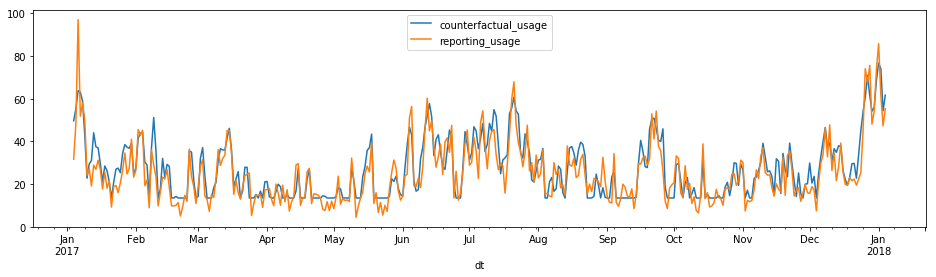

In [32]:
results = counterfactual_usage.to_frame(
    'counterfactual_usage'
).join(meter_data.value.to_frame(
    'reporting_usage'
))
results.plot(figsize=(16, 4))
results['savings'] = results.counterfactual_usage - results.reporting_usage

In [33]:
total_savings = results.savings.sum()
percent_savings = results.savings.sum() / results.counterfactual_usage.sum() * 100
print('Saved {:.1f} kWh in first year ({:.1f}%)'.format(total_savings, percent_savings))

Saved 799.5 kWh in first year (8.0%)


You can also look at disaggregated usage. If you want disaggregated savings you'll need a reporting model to compare against.

In [34]:
counterfactual_usage_disaggregated = model_fit.model.predict(daily_reporting_temperature_data, disaggregated=True)
counterfactual_usage_disaggregated.head()

,base_load,cooling_load,heating_load
dt,,,
2017-01-04 00:00:00+00:00,13.467873,0.0,36.153840
2017-01-05 00:00:00+00:00,13.467873,0.0,41.756582
2017-01-06 00:00:00+00:00,13.467873,0.0,50.283300
2017-01-07 00:00:00+00:00,13.467873,0.0,49.566676
2017-01-08 00:00:00+00:00,13.467873,0.0,45.399964


Next steps
----------

Congrats! You've finished the basic tutorial. Here are some things you might try next:

 - Read the docs at http://eemeter.openee.io
 - Match sites or obtain weather data from public sources with [EEWeather](http://eeweather.openee.io)
 - Load data of your own using [eemeter data loading methods](http://eemeter.openee.io/api.html#data-loading)
 - Try another sample.

Here are the names of the other samples to try out:

In [35]:
eemeter.samples()

['il-electricity-cdd-hdd-billing_bimonthly',
 'il-electricity-cdd-hdd-billing_monthly',
 'il-electricity-cdd-hdd-daily',
 'il-electricity-cdd-hdd-hourly',
 'il-electricity-cdd-only-billing_bimonthly',
 'il-electricity-cdd-only-billing_monthly',
 'il-electricity-cdd-only-daily',
 'il-electricity-cdd-only-hourly',
 'il-gas-hdd-only-billing_bimonthly',
 'il-gas-hdd-only-billing_monthly',
 'il-gas-hdd-only-daily',
 'il-gas-hdd-only-hourly',
 'il-gas-intercept-only-billing_bimonthly',
 'il-gas-intercept-only-billing_monthly',
 'il-gas-intercept-only-daily',
 'il-gas-intercept-only-hourly']